In [1]:
import rioxarray as rxr
import numpy as np

In [6]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [2]:
mountain_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
mt_ds = rxr.open_rasterio(mountain_path)
mt_ds

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.01 90.0 90.0 89.99 ... -89.96 -89.97 -89.98
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

In [3]:
dis_path = "../data/HydroRIVERS_v10_shp/raster/reduced_HydroRIVERS_v10.tif"
dis_ds = rxr.open_rasterio(dis_path)
dis_ds

<xarray.DataArray (band: 1, y: 1345, x: 3119)>
[4195055 values with dtype=uint64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0
  * y            (y) float64 83.51 83.41 83.31 83.21 ... -50.69 -50.79 -50.89
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [4]:
mt_match =mt_ds.rio.reproject_match(dis_ds)

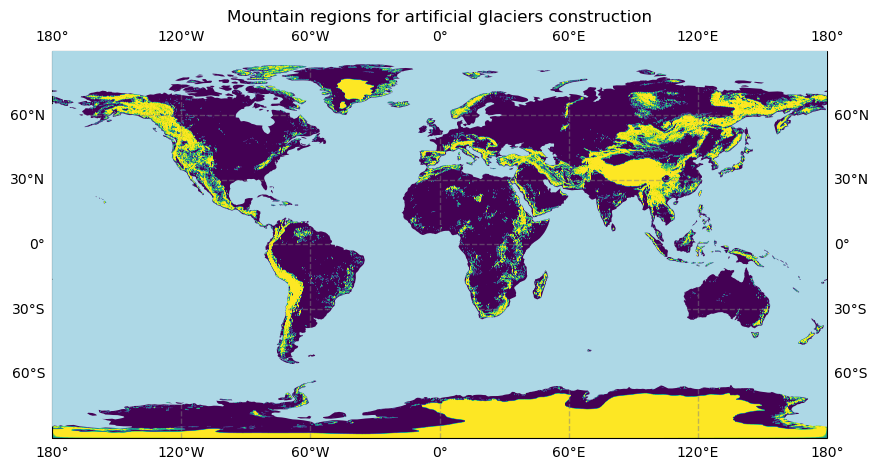

In [12]:
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_raster_on_world_map(raster_path):
    # Step 1: Read the raster data using rasterio
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Assuming the raster data is in the first band
        extent = src.bounds  # Get the geographical extent of the raster

    # Step 2: Create a Cartopy projection based on the extent of the raster data
    raster_crs = ccrs.PlateCarree()  # Use Plate Carrée (Equirectangular) projection

    # Step 3: Plot the raster image on the Cartopy projection
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1, projection=raster_crs)
        # Add land and ocean background
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Set the plot extent to cover the entire world
    ax.set_global()
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

    ax.imshow(raster_data, extent=[extent.left, extent.right, extent.bottom, extent.top],
              transform=raster_crs, cmap='viridis', origin='upper')

    # Add gridlines with default labeling
    gl = ax.gridlines(crs=raster_crs, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax.set_title('Mountain regions for artificial glaciers construction')

    # Save the figure
    plt.savefig("../figs/k1_mt_layer.png", bbox_inches="tight", dpi=300)

    plt.show()

# Example usage:
raster_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
plot_raster_on_world_map(raster_path)

In [9]:
dis_ds.values

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint64)

In [10]:
dis_ds.sum()

<xarray.DataArray ()>
array(137711, dtype=uint64)
Coordinates:
    spatial_ref  int64 0

In [11]:
dis_invert = 1 - dis_ds
dis_invert.sum()

<xarray.DataArray ()>
array(4057344, dtype=uint64)
Coordinates:
    spatial_ref  int64 0

In [ ]:
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_raster_on_world_map(raster_path):
    # Step 1: Read the raster data using rasterio
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Assuming the raster data is in the first band
        extent = src.bounds  # Get the geographical extent of the raster

    # Step 2: Create a Cartopy projection based on the extent of the raster data
    raster_crs = ccrs.PlateCarree()  # Use Plate Carrée (Equirectangular) projection

    # Step 3: Plot the raster image on the Cartopy projection
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1, projection=raster_crs)
        # Add land and ocean background
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Set the plot extent to cover the entire world
    ax.set_global()
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

    ax.imshow(raster_data, extent=[extent.left, extent.right, extent.bottom, extent.top],
              transform=raster_crs, cmap='viridis', origin='upper')

    # Add gridlines with default labeling
    gl = ax.gridlines(crs=raster_crs, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    # Save the figure
    plt.savefig("../figs/k1_mt_layer.png", bbox_inches="tight", dpi=300)

    plt.show()

# Example usage:
raster_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
plot_raster_on_world_map(raster_path)

In [23]:
mt_dis = np.logical_and(mt_match, dis_invert)

In [27]:
mt_dis = mt_dis.astype(np.uint8)
mt_dis.rio.to_raster("../output/mt_dis.tif")

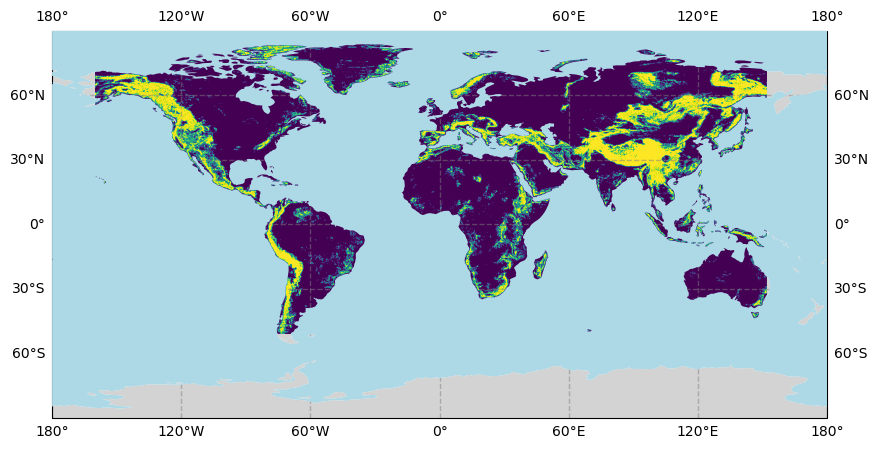

In [32]:
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_raster_on_world_map(raster_path):
    # Step 1: Read the raster data using rasterio
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Assuming the raster data is in the first band
        extent = src.bounds  # Get the geographical extent of the raster

    # Step 2: Create a Cartopy projection based on the extent of the raster data
    raster_crs = ccrs.PlateCarree()  # Use Plate Carrée (Equirectangular) projection

    # Step 3: Plot the raster image on the Cartopy projection
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1, projection=raster_crs)
        # Add land and ocean background
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Set the plot extent to cover the entire world
    ax.set_global()
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

    ax.imshow(raster_data, extent=[extent.left, extent.right, extent.bottom, extent.top],
              transform=raster_crs, cmap='viridis', origin='upper')

    # Add gridlines with default labeling
    gl = ax.gridlines(crs=raster_crs, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    plt.show()

# Example usage:
raster_path = "../output/mt_dis.tif"
plot_raster_on_world_map(raster_path)


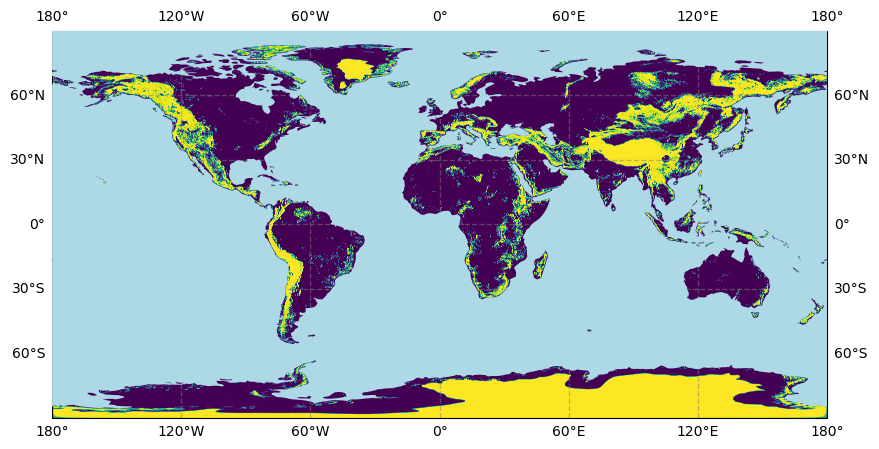

In [33]:
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_raster_on_world_map(raster_path):
    # Step 1: Read the raster data using rasterio
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Assuming the raster data is in the first band
        extent = src.bounds  # Get the geographical extent of the raster

    # Step 2: Create a Cartopy projection based on the extent of the raster data
    raster_crs = ccrs.PlateCarree()  # Use Plate Carrée (Equirectangular) projection

    # Step 3: Plot the raster image on the Cartopy projection
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1, projection=raster_crs)
        # Add land and ocean background
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Set the plot extent to cover the entire world
    ax.set_global()
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

    ax.imshow(raster_data, extent=[extent.left, extent.right, extent.bottom, extent.top],
              transform=raster_crs, cmap='viridis', origin='upper')

    # Add gridlines with default labeling
    gl = ax.gridlines(crs=raster_crs, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    plt.show()

# Example usage:
raster_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
plot_raster_on_world_map(raster_path)

In [34]:
import xarray as xr
import numpy as np
import rasterio
from rasterio.transform import from_origin
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../data/wettasmin_W5E5v2.0_'+year+'.nc')
var = 'wet_temperature'

# Set the window size
window_size = 60

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset[var]

# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Define the threshold range
thresholds = np.arange(-2, -11, -1)

# Create a 3D array to store the results for each threshold
result_data = np.zeros((len(thresholds), len(lat), len(lon)), dtype=np.uint8)

# Iterate over each threshold and compute the results
for i in range(len(thresholds)):
    threshold = thresholds[i]
    mask = year_dataset < threshold
    
    # Apply consecutive days condition
    consecutive_days = np.zeros_like(mask, dtype=int)
    consecutive_days[0] = mask[0].astype(int)
    
    for t in range(1, len(mask)):
        consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)
    
    mask_consecutive = consecutive_days >= window_size
    
    mask_2d = np.any(mask_consecutive, axis=0)
    
    # Store the result for the current threshold in the 3D array
    result_data[i, :, :] = mask_2d.astype(np.uint8)

# Save the results as a TIF file with each band representing a threshold value
output_file = "output_results.tif"
with rasterio.open(
    output_file,
    'w',
    driver='GTiff',
    height=len(lat),
    width=len(lon),
    count=len(thresholds),
    dtype='uint8',
    crs=ccrs.PlateCarree().to_string(),
    transform=from_origin(lon[0], lat[-1], lon[1]-lon[0], lat[1]-lat[0]),
) as dst:
    for i in range(len(thresholds)):
        dst.write(result_data[i, :, :], i + 1)

print("Results saved as", output_file)

Results saved as output_results.tif


In [35]:
path = "output_results.tif"
ds = rxr.open_rasterio(path)
ds

<xarray.DataArray (band: 9, y: 360, x: 720)>
[2332800 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9
  * x            (x) float64 -179.5 -179.0 -178.5 -178.0 ... 179.0 179.5 180.0
  * y            (y) float64 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

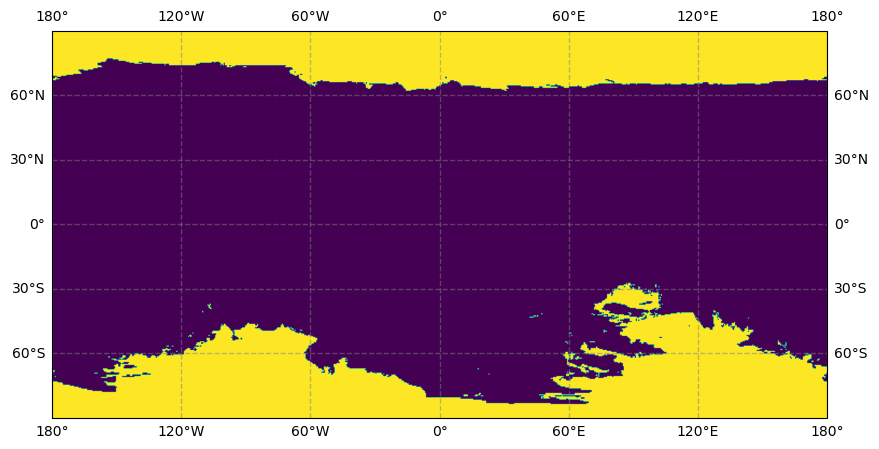

In [17]:
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_raster_on_world_map(raster_path):
    # Step 1: Read the raster data using rasterio
    with rasterio.open(raster_path) as src:
        raster_data = src.read(9)  # Assuming the raster data is in the first band
        extent = src.bounds  # Get the geographical extent of the raster

    # Step 2: Create a Cartopy projection based on the extent of the raster data
    raster_crs = ccrs.PlateCarree()  # Use Plate Carrée (Equirectangular) projection

    # Step 3: Plot the raster image on the Cartopy projection
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1, projection=raster_crs)
        # Add land and ocean background
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Set the plot extent to cover the entire world
    ax.set_global()
    #ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=3)

    ax.imshow(raster_data, extent=[extent.left, extent.right, extent.bottom, extent.top],
              transform=raster_crs, cmap='viridis', origin='upper')

    # Add gridlines with default labeling
    gl = ax.gridlines(crs=raster_crs, draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    plt.show()

# Example usage:
raster_path = "output_results_wgs84.tif"
plot_raster_on_world_map(raster_path)

(array([1589770.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  743030.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

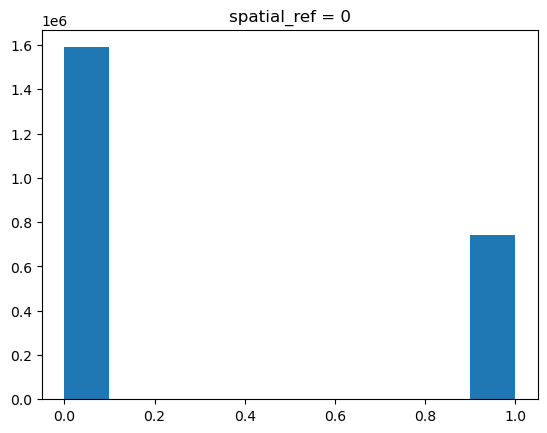

In [41]:
ds.plot()

AttributeError: 'Axes' object has no attribute 'gridlines'

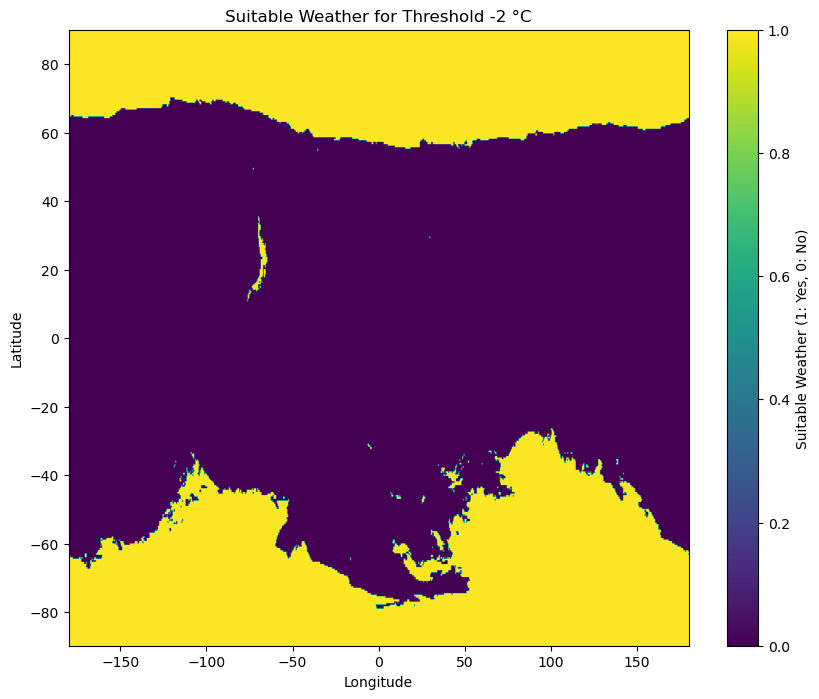

In [16]:
import rasterio
import matplotlib.pyplot as plt

# Path to the output TIF file
output_file = "output_results_wgs84.tif"

# Open the TIF file using rasterio
with rasterio.open(output_file) as src:
    # Read Band 1 (index 0) from the raster data
    band1_data = src.read(1)
    extent = src.bounds

    # Get the geographic extent of the raster
    #extent = rasterio.plot.plotting_extent(src)

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Display the raster data as an image
    im = ax.imshow(band1_data, extent=[extent.left, extent.right, extent.bottom, extent.top], cmap='viridis', origin='upper', aspect='auto')

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Suitable Weather (1: Yes, 0: No)')

    # Add map features
    ax.set_title('Suitable Weather for Threshold -2 °C')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    #ax.coastlines()
    ax.gridlines()

    plt.show()


Results for threshold -2 saved as output_result_threshold_-2.tif


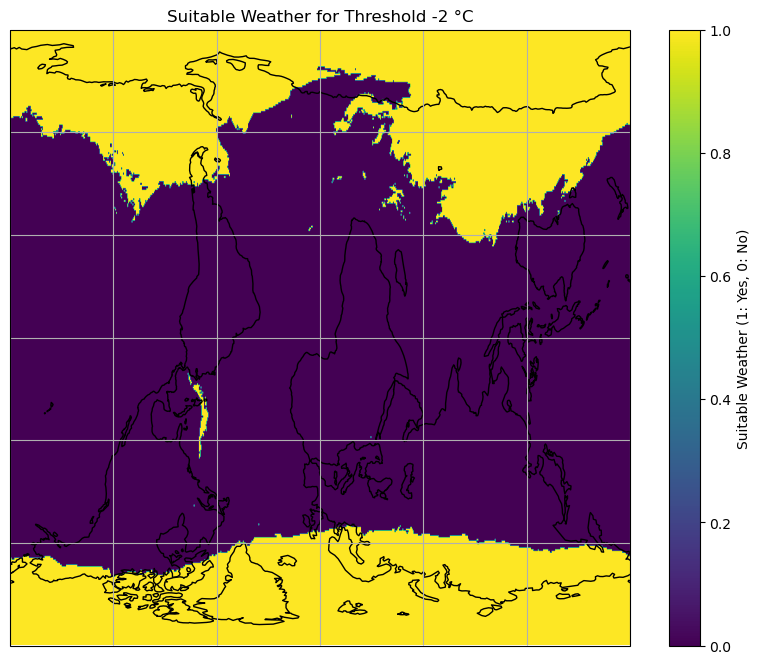

In [54]:
import xarray as xr
import numpy as np
import rasterio
from rasterio.transform import from_origin
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the netCDF file
year = '2019'
dataset = xr.open_dataset('../data/wettasmin_W5E5v2.0_'+year+'.nc')
var = 'wet_temperature'

# Set the window size
window_size = 60

# Extract the necessary variables
lat = dataset['lat']
lon = dataset['lon']
temperature = dataset[var]

# Filter the dataset to the year 2001
year_dataset = dataset.sel(time=year)[var]

# Define the threshold range
thresholds = np.arange(-2, -11, -1)

# Select the threshold of -2
threshold = -2
mask = year_dataset < threshold

# Apply consecutive days condition
consecutive_days = np.zeros_like(mask, dtype=int)
consecutive_days[0] = mask[0].astype(int)

for t in range(1, len(mask)):
    consecutive_days[t] = mask[t].astype(int) * (consecutive_days[t-1] + 1)

mask_consecutive = consecutive_days >= window_size

mask_2d = np.any(mask_consecutive, axis=0)

# Save the result for threshold -2 as a TIF file
output_file = "output_result_threshold_-2.tif"
transform = from_origin(lon[0], lat[-1], lon[1] - lon[0], lat[1] - lat[0])
with rasterio.open(
    output_file,
    'w',
    driver='GTiff',
    height=len(lat),
    width=len(lon),
    count=1,  # Number of bands
    dtype='uint8',  # Data type
    crs=ccrs.PlateCarree().to_string(),
    transform=transform,
) as dst:
    dst.write(mask_2d.astype(np.uint8), 1)

print("Results for threshold -2 saved as", output_file)

# Plot the TIF file
# Open the TIF file using rasterio
with rasterio.open(output_file) as src:
    # Read Band 1 (index 1) from the raster data
    band1_data = src.read(1)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Display the raster data as an image with the correct extent and transform
im = ax.imshow(band1_data, extent=[lon[0], lon[-1], lat[0], lat[-1]], cmap='viridis', origin='upper', aspect='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Suitable Weather (1: Yes, 0: No)')

# Add map features
ax.set_title('Suitable Weather for Threshold -2 °C')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.coastlines()
ax.gridlines()

plt.show()


In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the netCDF file
dataset = xr.open_dataset('../output/mt_dis.nc')
dataset

<xarray.Dataset>
Dimensions:  (lat: 1345, lon: 3119)
Coordinates:
  * lat      (lat) float64 -50.89 -50.79 -50.69 -50.59 ... 83.31 83.41 83.51
  * lon      (lon) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:           Area
    GDAL_STATISTICS_COVARIANCES:  0
    GDAL_STATISTICS_MAXIMUM:      1
    GDAL_STATISTICS_MEAN:         1
    GDAL_STATISTICS_MINIMUM:      1
    GDAL_STATISTICS_SKIPFACTORX:  1
    GDAL_STATISTICS_SKIPFACTORY:  1
    GDAL_STATISTICS_STDDEV:       0
    Conventions:                  CF-1.5
    GDAL:                         GDAL 3.7.0, released 2023/05/02
    history:                      Sun Jul 30 15:23:42 2023: GDAL CreateCopy( ...

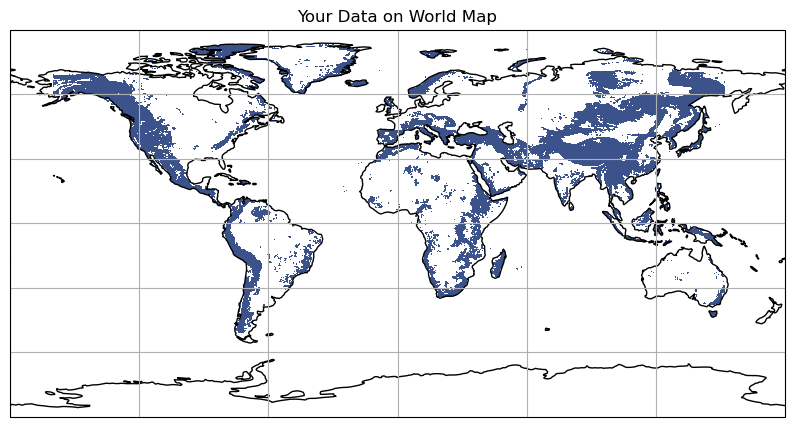

In [5]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load the NetCDF file
dataset = xr.open_dataset('../output/mt_dis.nc')

# Extract the necessary variables (e.g., latitude, longitude, data)
lat = dataset['lat']
lon = dataset['lon']
data = dataset['Band1']  # Replace 'your_variable' with the variable name from your NetCDF file

# Create a larger figure and subplot with Plate Carrée (Equirectangular) projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the world map using contourf
contour_plot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels=100)

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set the plot extent to cover the entire world
ax.set_global()

# Set plot title and labels
ax.set_title('Your Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar for the contour plot
#cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical', shrink=0.7)
#cbar.set_label('Your Data Units')  # Replace 'Your Data Units' with appropriate units for your data

# Show the plot
plt.show()


In [4]:
import rasterio
# Check coordinate reference system (CRS) of both datasets
print('Shape file Projection: ', rasterio.open("output_results.tif").crs)

Shape file Projection:  PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown based on WGS 84 ellipsoid",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1,ID["EPSG",9001]]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unknown",METHOD["Equidistant Cylindrical",ID["EPSG",1028]],PARAMETER["Latitude of 1st standard parallel",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["unknown",111319.490793274],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["unknown",111319.490793274],ID["EPSG",8807]]],CS[Cartesian,3],AXIS["(E)",east,ORDER[1],LENGTHUNIT["unknown",111319.490793274]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["unknown",111319.490793274]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]


In [8]:
path = "output_results.tif"
ds = rxr.open_rasterio(path)
print_raster(ds)

shape: (360, 720)
resolution: (0.5, 0.5)
bounds: (-179.75, -89.75, 180.25, 90.25)
sum: 743030
CRS: PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown based on WGS 84 ellipsoid",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1,ID["EPSG",9001]]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unknown",METHOD["Equidistant Cylindrical",ID["EPSG",1028]],PARAMETER["Latitude of 1st standard parallel",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["unknown",111319.490793274],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["unknown",111319.490793274],ID["EPSG",8807]]],CS[Cartesian,3],AXIS["(E)",east,ORDER[1],LENGTHUNIT["unknown",111319.490793274]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["unknown",111319.490793274]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPS

In [12]:
# Create a rasterio crs object for wgs 84 crs - lat / lon
#crs_wgs84 = rio.crs.from_string('EPSG:4326')

# Reproject the data using the crs object
ds = ds.rio.reproject('EPSG:4326')
ds.rio.crs

CRS.from_epsg(4326)

In [14]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open("output_results.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('output_results_wgs84.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [15]:
path = "output_results_wgs84.tif"
ds = rxr.open_rasterio(path)
ds.rio.crs

CRS.from_epsg(4326)